In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
from keras import models
from keras.layers import Dense
from keras.models.cloning import Sequential
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np

from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt

In [5]:
label = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}


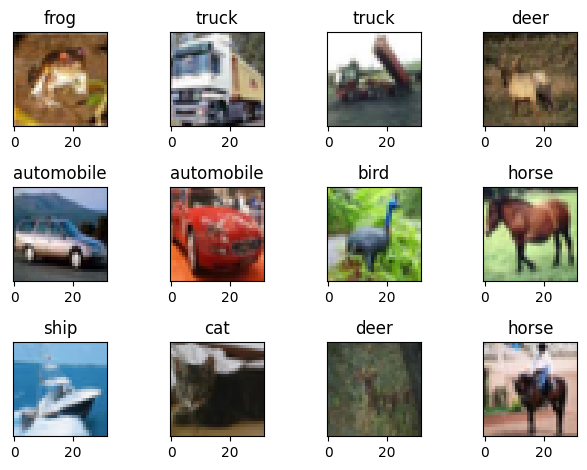

In [6]:
for i in range(12):  
  plt.subplot(3,4,i+1) 
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('{}'.format(label[int(y_train[i])]))
  plt.xticks
  plt.yticks([])

In [7]:

model=Sequential()
model.add(Dense(1023,activation='relu',input_shape = (32*32*3,)))
model.add(Dense(512,activation='relu',name='layout1'))
model.add(Dense(256,activation='relu',name='layout2'))
model.add(Dense(128,activation='relu',name='layout3'))
model.add(Dense(64,activation='relu',name='layout4'))
model.add(Dense(32,activation='relu',name='layout5'))
model.add(Dense(10,activation='softmax',name='layout6'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1023)              3143679   
                                                                 
 layout1 (Dense)             (None, 512)               524288    
                                                                 
 layout2 (Dense)             (None, 256)               131328    
                                                                 
 layout3 (Dense)             (None, 128)               32896     
                                                                 
 layout4 (Dense)             (None, 64)                8256      
                                                                 
 layout5 (Dense)             (None, 32)                2080      
                                                                 
 layout6 (Dense)             (None, 10)                3

In [8]:
x_train=x_train.reshape((50000,32*32*3)) 
x_train=x_train.astype('float32')/255 
x_test=x_test.reshape((10000,32*32*3))
x_test=x_test.astype('float32')/255
  # one hot encoding 
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [9]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data = (x_test, y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Accuracy: ',test_acc)
print('Lost: ',test_loss)

Epoch 1/30
1563/1563 [==============================] - 83s 52ms/step - loss: 1.9843 - accuracy: 0.2641 - val_loss: 1.9054 - val_accuracy: 0.3176
Epoch 2/30
1563/1563 [==============================] - 80s 51ms/step - loss: 1.7822 - accuracy: 0.3587 - val_loss: 1.7020 - val_accuracy: 0.3868
Epoch 3/30
1563/1563 [==============================] - 79s 51ms/step - loss: 1.6969 - accuracy: 0.3915 - val_loss: 1.7177 - val_accuracy: 0.3855
Epoch 4/30
1563/1563 [==============================] - 80s 51ms/step - loss: 1.6487 - accuracy: 0.4135 - val_loss: 1.7473 - val_accuracy: 0.3795
Epoch 5/30
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6160 - accuracy: 0.4264 - val_loss: 1.7208 - val_accuracy: 0.3844
Epoch 6/30
1563/1563 [==============================] - 83s 53ms/step - loss: 1.5930 - accuracy: 0.4378 - val_loss: 1.7449 - val_accuracy: 0.3959
Epoch 7/30
1563/1563 [==============================] - 81s 52ms/step - loss: 1.5720 - accuracy: 0.4454 - val_loss: 1.6812 -

In [10]:
model.save('CIFAR10.h5')
model11 = load_model('CIFAR10.h5')
model11.summary()
print(model11.predict([x_test]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1023)              3143679   
                                                                 
 layout1 (Dense)             (None, 512)               524288    
                                                                 
 layout2 (Dense)             (None, 256)               131328    
                                                                 
 layout3 (Dense)             (None, 128)               32896     
                                                                 
 layout4 (Dense)             (None, 64)                8256      
                                                                 
 layout5 (Dense)             (None, 32)                2080      
                                                                 
 layout6 (Dense)             (None, 10)                3

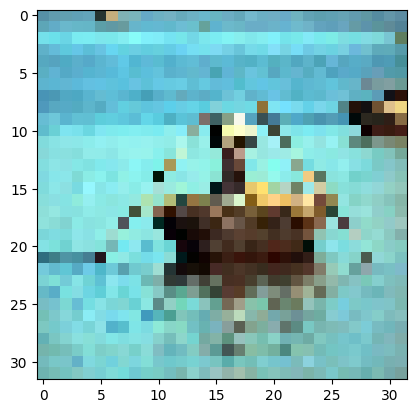

In [12]:
url = r'thuyen.jpg'
img = load_img(url, target_size=(32, 32))
plt.imshow(img)

In [13]:
model1 = load_model('CIFAR10.h5')
img = img_to_array(img)
img = img.reshape(1,3*32*32)
img = img.astype('float32') / 255

label[np.argmax(model1.predict(img))]

1/1 [==============================] - 0s 93ms/step


'ship'